In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import datetime

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Polygon as mplPolygon
from mpl_toolkits.basemap import Basemap
from shapely.geometry.geo import mapping
from shapely.geometry import Polygon
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### <center> 2 неделя

**Задание 1**

- Загрузите агрегированные данные о поездках в мае 2016. Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.

In [58]:
ag_data=pd.read_csv('C:\\Users\\Pavel\\Desktop\\coursera\\6course\\taxi\\aggregate_data.csv', header=0, sep=',',index_col='Unnamed: 0')
ag_data.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,...,r2491,r2492,r2493,r2494,r2495,r2496,r2497,r2498,r2499,r2500
h0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
count_trip=[]
mean_count_trip=[]
for i in ag_data.columns:
    count_trip.append(sum(ag_data[i]))
    mean_count_trip.append(mean(ag_data[i]))
print u"количество ячеек, из которых в мае не было совершено ни одной поездки =",count_trip.count(0)

количество ячеек, из которых в мае не было совершено ни одной поездки = 1283


In [60]:
agg_data = pd.DataFrame(columns = ['total_rides', 'rides_per_hour'])
agg_data['total_rides']=count_trip
agg_data['rides_per_hour']=mean_count_trip

,total_rides,rides_per_hour
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [61]:
regions = pd.read_csv('C:\\Users\\Pavel\\Desktop\\coursera\\6course\\taxi\\regions.csv', sep=';')
regions.set_index('region', inplace=True)

agg_data['rel_count'] = agg_data['total_rides'] / agg_data['total_rides'].max()
regions_w_counts = regions.join(agg_data)
regions_w_counts.head()

,west,east,south,north,total_rides,rides_per_hour,rel_count
region,,,,,,,
1,-74.25559,-74.244478,40.496120,40.504508,0.0,0.0,0.0
2,-74.25559,-74.244478,40.504508,40.512896,0.0,0.0,0.0
3,-74.25559,-74.244478,40.512896,40.521285,0.0,0.0,0.0
4,-74.25559,-74.244478,40.521285,40.529673,0.0,0.0,0.0
5,-74.25559,-74.244478,40.529673,40.538061,0.0,0.0,0.0


**Задание 2**

- Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.

In [62]:
meridians = np.concatenate([regions['east'].unique(), regions['west'].unique()])
meridians = np.unique(meridians)

parallels = np.concatenate([regions['south'].unique(), regions['north'].unique()])
parallels = np.unique(parallels)

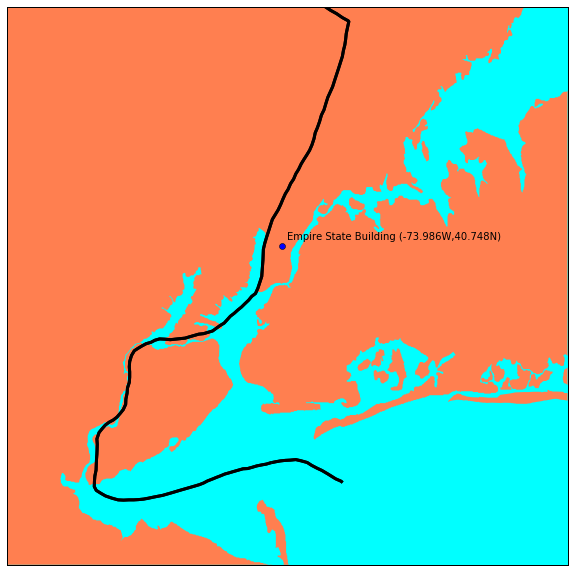

In [70]:
from mpl_toolkits.basemap import Basemap

count_trip_full=np.array(count_trip)
count_trip= np.array(count_trip)
max_count_trip= max(count_trip)

 
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
 
bounds = [-74.25559, 40.49612, -73.70001, 40.91553]
minx, miny, maxx, maxy = bounds
w, h = maxx - minx, maxy - miny
m = Basemap(
    resolution='f',
    projection='merc',
    llcrnrlon=minx - 0.2 * w,
    llcrnrlat=miny - 0.2 * h,
    urcrnrlon=maxx + 0.2 * w,
    urcrnrlat=maxy + 0.2 * h)
# нарисуем границу штата
m.drawstates(linewidth=3)

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')

xpt,ypt = m(-73.985756,40.748306)
m.plot(xpt,ypt,'bo')
plt.text(xpt+800,ypt+1000,u'Empire State Building (%5.3fW,%3.3fN)' % (-73.985756,40.748306))


plt.show()


**Задание 3**

- Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

*ячейки без цвета -поездок не было совершено.

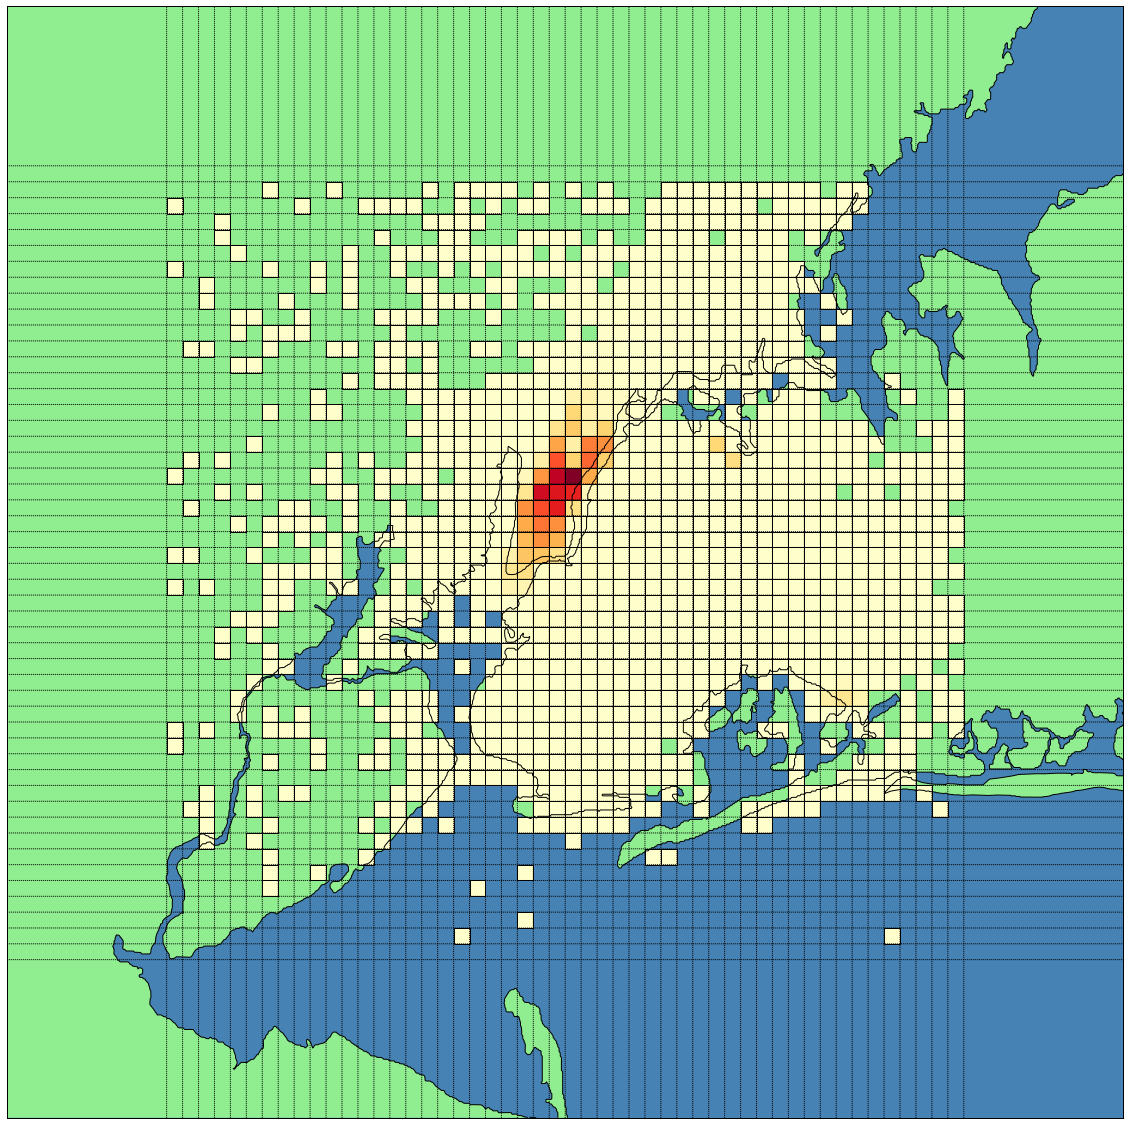

In [71]:
from matplotlib.collections import PatchCollection
from shapely.geometry import box
from descartes import PolygonPatch

def draw_region(ax, row):
    lons = row[['west', 'west', 'east', 'east']].values
    lats = row[['north', 'south', 'south', 'north']].values
    x, y = m(lons, lats)
    xy = zip(x, y)

    color = cm.YlOrRd(row['rel_count'])
    poly = mplPolygon(xy, facecolor=color, alpha=1 if row['total_rides'] > 0 else 0)
    ax.add_patch(poly)


plt.figure(figsize=(20, 20))

m.drawmapboundary(fill_color='steelblue')
m.drawcoastlines()
m.fillcontinents(color='lightgreen')
m.drawrivers()

m.drawmeridians(meridians)
m.drawparallels(parallels)

regions_w_counts.apply(lambda x: draw_region(plt.gca(), x), axis=1)

plt.show()

На карте видно, что некоторые ячейки в море, что является невозможным.

**Задание 4**
- Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

In [110]:
esb_lat = 40.7484
esb_lon = -73.9857
sol_lat = 40.6892
sol_lon = -74.0445

import folium
map_ny = folium.Map(location=[esb_lat, esb_lon])
folium.Marker(location=[sol_lat, sol_lon], popup='Statue of Liberty').add_to(map_ny)
map_ny

**Задание 5**
- Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

In [104]:
# Интерактивная карта с обозначением среднего числа поездок в час
import folium.plugins
map = folium.Map(location=center, zoom_start=11)
#max_mean = means_by_regions.max()
c = []
for r in regions.index:
    mean = regions_w_counts.rides_per_hour[r]
    if mean >= 5:
        x = (regions.loc[r, 'west']+regions.loc[r, 'east'])/2
        y = (regions.loc[r, 'south']+regions.loc[r, 'north'])/2
        c.append([y, x, mean])
folium.plugins.HeatMap(c, min_opacity=0.01, radius=8, blur=5, gradient={1: 'brown'}).add_to(map)
map

**Задание 6**
- Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.

In [108]:
regions_5_rides = regions_w_counts[regions_w_counts['rides_per_hour'] >= 5.0]
print u"Количество =",len(regions_5_rides)

Количество = 102


По карте можно скачать, что со всех ячеек поездки на самом деле возможны, так как ячейки имеют пересечение с "сушей", откуда возожно отправится на такси. 

In [106]:
for r in regions_5_rides.index:
    mean = regions_w_counts.rides_per_hour[r]
    if mean >= 5:
        x = (regions.loc[r, 'west']+regions.loc[r, 'east'])/2
        y = (regions.loc[r, 'south']+regions.loc[r, 'north'])/2
        c.append([y, x, mean])
folium.plugins.HeatMap(c, min_opacity=0.01, radius=8, blur=5, gradient={1: 'brown'}).add_to(map)
map